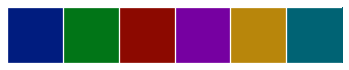

In [11]:
%matplotlib inline
import seaborn 
seaborn.set(
    context="talk", palette=seaborn.color_palette('dark')
)

from matplotlib import pylab
seaborn.palplot(
    seaborn.color_palette("dark")
)

In [12]:
import pathlib
import numpy as np
import pandas

from matplotlib import pylab

from multiprocessing import Pool

from scipy import signal

from kaskady2.analyze.fits import * 
from kaskady2.analyze.profile import *
from kaskady2.analyze.profile_fits import *
from kaskady2.analyze.fluctuation_treshold import *
from kaskady2.loader.reader import CascadeSetLoader

import os


In [22]:
fits_dir = pathlib.Path("/tmp/fits-fluc-final")
os.makedirs(str(fits_dir), exist_ok=True)

In [14]:
fsm = FitSetManager.restore(
    "/home/jb/kaskady-data/results/fluctuation.bin", 
    index_attrs=('A', 'material', 'ecuts_kev', 'energy_mev'), 
    expected_params=['lambda', 'k', 'b']
)

In [15]:
# fsm.frame.A = ["{:.2f}".format(float(A)) for A in fsm.frame.A]
# fsm.frame.set_index(drop=False, keys=list(fsm.index_attrs),inplace=True)

In [31]:
def plot_parameter_dependence(param, frame, params): 
    pylab.clf() 
    series = frame[param]
    std = frame["sigma " + param]
    pylab.errorbar(
        np.asarray(series.index),
        np.asarray(series.values),
        yerr = np.asanyarray(std.values) * 2,  # 95 confidence interval
        fmt="o",
        label = "Dependence for {} with 95% confidence interval".format(param)
    )

    pylab.xlabel("$E_\gamma$ [MeV]")
    pylab.ylabel("Parameter value [rad. len.]")
    params['ecuts_mev'] = "{:.2f}".format(float(params['ecuts_kev'] / 1000))
    params['A'] = "{:.2f}".format(float(params['A']))
    pylab.title(
        "$E_{{c.o.}}={ecuts_mev}MeV$  "
        "Material: {material}"
        "$A={A}$".format(**params), fontsize=12)
    pylab.suptitle(
        "Energy dependence for {}".format(param), fontsize=18
    )
    file_name = str(fits_dir) + "/" + "-".join([param, params['A'], params['ecuts_mev'], params['material']]) + '.png'
    pylab.legend()
#     print(file_name)
    pylab.savefig(file_name)

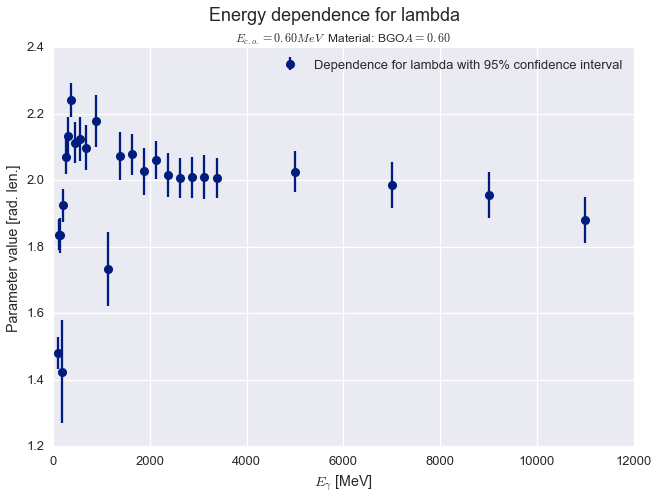

In [32]:
series = plot_parameter_dependence(*next(fsm.make_param_plots(
    index_attrs=['A', 'material', 'ecuts_kev'],
    parameters=['lambda', 'k', 'b'],
)))

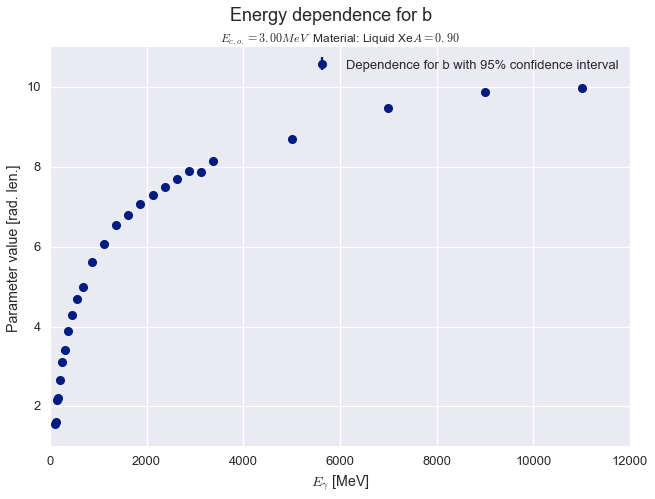

In [33]:
for par in fsm.make_param_plots(
    index_attrs=['A', 'material', 'ecuts_kev'],
    parameters=['lambda', 'k', 'b'],
): 
    plot_parameter_dependence(*par)

In [40]:
def plot_parameter_dependence_ecut(param, big_frame, params): 
    print(big_frame.ecuts_kev.unique())
        
    pylab.clf()
    for ecut in big_frame.ecuts_kev.unique():
        frame = big_frame.loc[ecut]
        
        series = frame[param]
        std = frame["sigma " + param]
        params['ecuts_mev'] = "{:.2f}".format(float(ecut / 1000))
        pylab.errorbar(
            np.asarray(series.index),
            np.asarray(series.values),
            yerr = np.asanyarray(std.values) * 2,  # 95 confidence interval
            fmt="o",
            label = "Dependence for {} with 95% confidence interval. E_{{c.o.}}={ecut}".format(
                param, ecut=params['ecuts_mev']
            )
        )

    pylab.xlabel("$E_\gamma$ [MeV]")
    pylab.ylabel("Parameter value [rad. len.]")

    params['A'] = "{:.2f}".format(float(params['A']))
    pylab.title(
        "Material: {material}"
        "$A={A}$".format(**params), fontsize=12)
    pylab.suptitle(
        "Energy dependence for {}".format(param), fontsize=18
    )
    file_name = str(fits_dir) + "/" + "-".join(['all-ecuts', param, params['A'], params['material']]) + '.png'
    pylab.legend()
#     print(file_name)
    pylab.savefig(file_name)

[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]
[ 600 1200 2000 3000]


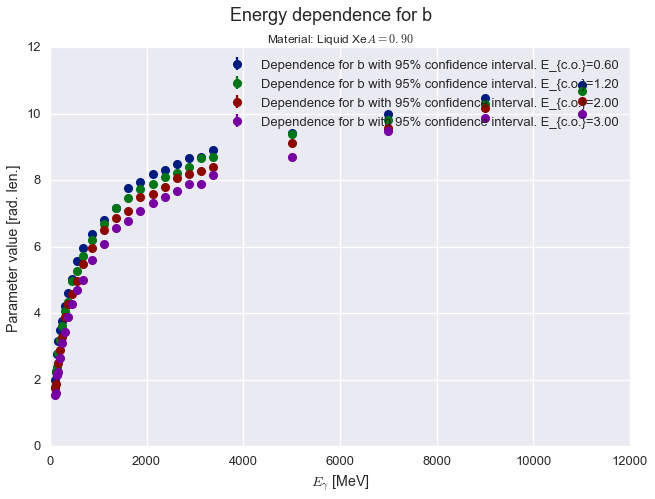

In [41]:
for par in fsm.make_param_plots(
    index_attrs=['A', 'material'],
    parameters=['lambda', 'k', 'b'],
): 
    plot_parameter_dependence_ecut(*par)

### 